In [1]:
%matplotlib inline

In [37]:
# dependencies & set up
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
from IPython.display import display

data_filepath = "Resources/output_data/school_directory_enrollment.csv"
data_df = pd.read_csv(data_filepath)

In [3]:
data_df.head()

,Unnamed: 0,CDS_CODE,SCHOOL,School,District,NCESDist,County,Street,Zip,City,State,year,ENR_TOTAL
0,8,1100170112607,Envision Academy for Arts & Technology,Envision Academy for Arts & Technology,Alameda County Office of Education,0691051,Alameda,1515 Webster Street,94612-3355,Oakland,CA,2015,407
1,9,1100170112607,Envision Academy for Arts & Technology,Envision Academy for Arts & Technology,Alameda County Office of Education,0691051,Alameda,1515 Webster Street,94612-3355,Oakland,CA,2016,403
2,10,1100170112607,Envision Academy for Arts & Technology,Envision Academy for Arts & Technology,Alameda County Office of Education,0691051,Alameda,1515 Webster Street,94612-3355,Oakland,CA,2017,413
3,11,1100170112607,Envision Academy for Arts & Technology,Envision Academy for Arts & Technology,Alameda County Office of Education,0691051,Alameda,1515 Webster Street,94612-3355,Oakland,CA,2018,385
4,12,1100170112607,Envision Academy for Arts & Technology,Envision Academy for Arts & Technology,Alameda County Office of Education,0691051,Alameda,1515 Webster Street,94612-3355,Oakland,CA,2019,412


In [4]:
district_groups_df = data_df.groupby(by=["District", "year"]).sum()
enroll_by_dist_df = district_groups_df["ENR_TOTAL"].to_frame().reset_index()
enroll_by_dist_df

,District,year,ENR_TOTAL
0,ABC Unified,2015,20811
1,ABC Unified,2016,20706
2,ABC Unified,2017,20497
3,ABC Unified,2018,20402
4,ABC Unified,2019,20229
...,...,...,...
4158,Yucaipa-Calimesa Joint Unified,2015,9880
4159,Yucaipa-Calimesa Joint Unified,2016,9960
4160,Yucaipa-Calimesa Joint Unified,2017,10056
4161,Yucaipa-Calimesa Joint Unified,2018,9975


In [5]:
cal_enroll_groupby = data_df.groupby(by="year").sum()
cal_enrollment_df = cal_enroll_groupby["ENR_TOTAL"].reset_index()
cal_enrollment_df

,year,ENR_TOTAL
0,2015,5702282
1,2016,5702322
2,2017,5695798
3,2018,5665488
4,2019,5645516


In [12]:
cal_enroll_mean_groupby = data_df.groupby(by="year").mean()
cal_enroll_mean_df = cal_enroll_groupby["ENR_TOTAL"].reset_index()
cal_enroll_mean_df

,year,ENR_TOTAL
0,2015,5702282
1,2016,5702322
2,2017,5695798
3,2018,5665488
4,2019,5645516


In [6]:
county_groupby = data_df.groupby(by=["County", "year"]).mean().astype("int64")
county_enrollment_df = county_groupby["ENR_TOTAL"].reset_index()
county_enrollment_df

,County,year,ENR_TOTAL
0,Alameda,2015,586
1,Alameda,2016,588
2,Alameda,2017,594
3,Alameda,2018,590
4,Alameda,2019,594
...,...,...,...
240,Sonoma,2015,289
241,Sonoma,2016,285
242,Sonoma,2017,281
243,Sonoma,2018,276


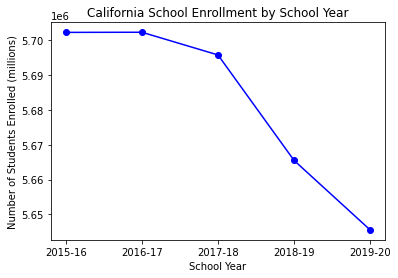

In [7]:
x_axis = ["2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]
y_california = cal_enrollment_df["ENR_TOTAL"]

plt.plot(x_axis, y_california, marker="o", color="blue")
plt.title("California School Enrollment by School Year")
plt.xlabel("School Year")
plt.ylabel("Number of Students Enrolled (millions)")

plt.show()

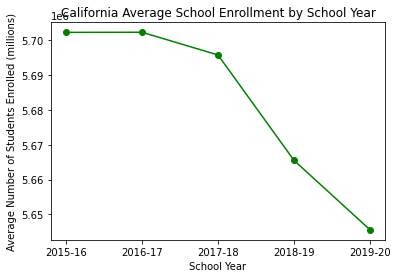

In [13]:
x_axis = ["2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]
y_cal_mean = cal_enroll_mean_df["ENR_TOTAL"]

plt.plot(x_axis, y_cal_mean, marker="o", color="green")
plt.title("California Average School Enrollment by School Year")
plt.xlabel("School Year")
plt.ylabel("Average Number of Students Enrolled (millions)")

plt.show()

In [8]:
is_lausd = enroll_by_dist_df["District"] == "Los Angeles Unified"

lausd_df = enroll_by_dist_df.loc[is_lausd, :]
lausd_df

,District,year,ENR_TOTAL
2056,Los Angeles Unified,2015,634387
2057,Los Angeles Unified,2016,628644
2058,Los Angeles Unified,2017,617915
2059,Los Angeles Unified,2018,605310
2060,Los Angeles Unified,2019,594744


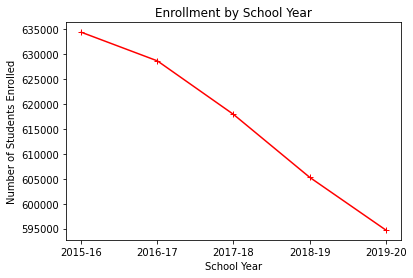

In [9]:
x_axis = ["2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]
y_axis = lausd_df["ENR_TOTAL"]

plt.plot(x_axis, y_axis, marker="+", color="red")
plt.title("Enrollment by School Year")
plt.xlabel("School Year")
plt.ylabel("Number of Students Enrolled")

plt.show()

In [10]:
district_list = enroll_by_dist_df["District"].unique()

In [16]:
x_axis = ["2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]


def enrollment_plot(District):
#     for District in district_list:
    loop_dist_df = enroll_by_dist_df.loc[enroll_by_dist_df["District"] == District, :]
    y_axis = loop_dist_df["ENR_TOTAL"]
    print(f"{District}")
        
    try:
        plt.plot(x_axis, y_axis, marker="+", color="red")
        plt.title("Enrollment by School Year")
        plt.xlabel("School Year")
        plt.ylabel("Number of Students Enrolled")
            
        plt.show()
            
    except:
        print(f"Can't show this plot")

Type in your district:  San Diego Unified


San Diego Unified


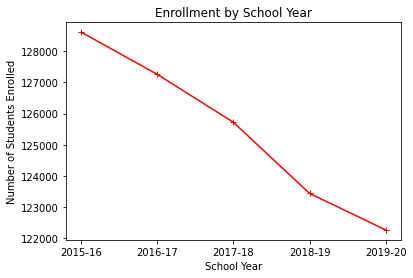

In [26]:
district_input = input(f"Type in your district: ")
enrollment_plot(district_input)

In [24]:
loop_dist_df = enroll_by_dist_df.loc[enroll_by_dist_df["District"] == "San Diego Unified", :]
loop_dist_df

,District,year,ENR_TOTAL
3319,San Diego Unified,2015,128608
3320,San Diego Unified,2016,127257
3321,San Diego Unified,2017,125721
3322,San Diego Unified,2018,123444
3323,San Diego Unified,2019,122274


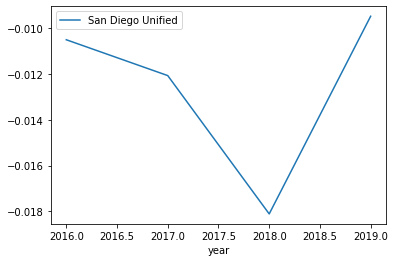

,Percent Change
3319,nan%
3320,-1.05%
3321,-1.21%
3322,-1.81%
3323,-0.95%


In [55]:
fig,ax = plt.subplots()
for code, df in loop_dist_df.groupby("District"):
    Y_df = df.assign(Perc_diff=loop_dist_df["ENR_TOTAL"].diff()/loop_dist_df["ENR_TOTAL"].shift())
    Y_df.plot(x="year", y="Perc_diff", label=code, ax=ax)
plt.show()
Y_df["Percent Change"] = Y_df["Perc_diff"]
Y_df["Percent Change"].to_frame().style.format({"Percent Change":'{:.2%}'})

# Y_df

In [36]:
Y_df.dtypes

District           object
year                int64
ENR_TOTAL           int64
Perc_diff         float64
Percent Change    float64
dtype: object